#### Import the libraries, load dataset, print shape of data, visualize the images in dataset

In [404]:
# Import necessary modules.
import pandas as pd
import numpy as np
import tensorflow
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import BatchNormalization

In [209]:
labels = pd.read_csv('labels.csv')    

In [210]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [211]:
labels.size

4750

In [212]:
labels.Label[0]

'Small-flowered Cranesbill'

In [213]:
labels.shape

(4750, 1)

In [214]:
labels['cc']= pd.Categorical(labels.Label)

In [215]:
labels['code'] = labels.cc.cat.codes

In [216]:
labels.head

<bound method NDFrame.head of                           Label                         cc  code
0     Small-flowered Cranesbill  Small-flowered Cranesbill    10
1     Small-flowered Cranesbill  Small-flowered Cranesbill    10
2     Small-flowered Cranesbill  Small-flowered Cranesbill    10
3     Small-flowered Cranesbill  Small-flowered Cranesbill    10
4     Small-flowered Cranesbill  Small-flowered Cranesbill    10
...                         ...                        ...   ...
4745           Loose Silky-bent           Loose Silky-bent     6
4746           Loose Silky-bent           Loose Silky-bent     6
4747           Loose Silky-bent           Loose Silky-bent     6
4748           Loose Silky-bent           Loose Silky-bent     6
4749           Loose Silky-bent           Loose Silky-bent     6

[4750 rows x 3 columns]>

In [217]:
labels['cc']

0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: cc, Length: 4750, dtype: category
Categories (12, object): [Black-grass, Charlock, Cleavers, Common Chickweed, ..., Scentless Mayweed, Shepherds Purse, Small-flowered Cranesbill, Sugar beet]

In [218]:
labels.drop(['cc'], axis = 1)

,Label,code
0,Small-flowered Cranesbill,10
1,Small-flowered Cranesbill,10
2,Small-flowered Cranesbill,10
3,Small-flowered Cranesbill,10
4,Small-flowered Cranesbill,10
...,...,...
4745,Loose Silky-bent,6
4746,Loose Silky-bent,6
4747,Loose Silky-bent,6
4748,Loose Silky-bent,6


In [219]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Label   4750 non-null   object  
 1   cc      4750 non-null   category
 2   code    4750 non-null   int8    
dtypes: category(1), int8(1), object(1)
memory usage: 46.9+ KB


In [220]:
labels['code'].unique()

array([10,  5,  9,  4,  3,  1,  2,  8, 11,  7,  0,  6], dtype=int8)

In [221]:
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [163]:
data = np.load('images.npy', mmap_mode='r')

In [164]:
data.shape

(4750, 128, 128, 3)

In [165]:
data[1]

memmap([[[ 30,  47,  63],
         [ 30,  50,  60],
         [ 34,  47,  63],
         ...,
         [ 48,  59,  74],
         [ 42,  54,  69],
         [ 44,  56,  70]],

        [[ 30,  49,  67],
         [ 26,  47,  60],
         [ 30,  40,  61],
         ...,
         [ 50,  64,  76],
         [ 52,  67,  78],
         [ 45,  56,  72]],

        [[ 23,  46,  65],
         [ 27,  48,  64],
         [ 25,  40,  59],
         ...,
         [ 39,  59,  81],
         [ 47,  62,  79],
         [ 42,  54,  69]],

        ...,

        [[ 32,  54,  72],
         [ 58,  82,  95],
         [ 72,  96, 109],
         ...,
         [ 60,  80,  99],
         [ 50,  72,  92],
         [ 45,  64,  84]],

        [[ 31,  51,  67],
         [ 25,  50,  64],
         [ 38,  64,  80],
         ...,
         [ 63,  83, 101],
         [ 57,  78,  96],
         [ 50,  69,  89]],

        [[ 18,  32,  56],
         [ 16,  27,  50],
         [ 34,  49,  71],
         ...,
         [ 59,  84, 101],
        

In [166]:
x = data.shape[0]

In [167]:
x

4750

Label 
 Label ID: 0 
 Name: Small-flowered Cranesbill


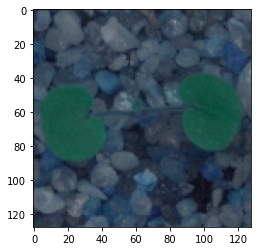

In [168]:
i = 0
image = data[i]
#label = labels[i][0]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[0]}')
plt.imshow(image)

Label 
 Label ID: 4700 
 Name: Loose Silky-bent


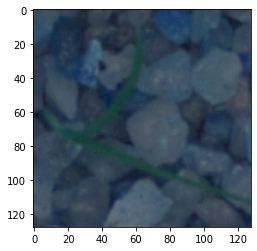

In [169]:
i = 4700
image = data[i]
#label = labels[i][0]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[i]}')
plt.imshow(image)

Label 
 Label ID: 1000 
 Name: Shepherds Purse


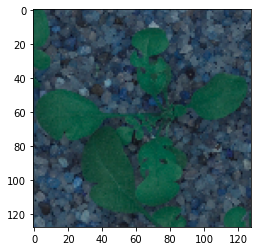

In [170]:
i = 1000
image = data[i]
print(f'Label \n Label ID: {i} \n Name: {labels.Label[i]}')
plt.imshow(image)

In [42]:
#data1 = np.append(labels,data)

In [45]:
#data1.shape

(233476750,)

In [136]:
# Convert labels to one hot vectors.

#from sklearn.preprocessing import LabelBinarizer
#enc = LabelBinarizer()
#y = enc.fit_transform(labels)

In [137]:
#y.shape

(4750, 12)

#### Data Pre-processing: 
####       a. Normalization.
####       b. Gaussian Blurring.
####       c. Visualize data after pre-processing

#### Reshape the data .....

In [171]:
data1 = data.reshape(data.shape[0], 128, 128, 3)

In [175]:
data1.shape[0]

4750

#### Normalization

In [176]:
data1 = data1.astype('float32')
data1 /= 255

In [177]:
data1

memmap([[[[0.13725491, 0.20392157, 0.30588236],
          [0.14117648, 0.19215687, 0.29803923],
          [0.12156863, 0.1764706 , 0.27058825],
          ...,
          [0.30588236, 0.37254903, 0.44705883],
          [0.29803923, 0.3647059 , 0.43137255],
          [0.3137255 , 0.37254903, 0.42745098]],

         [[0.12941177, 0.18039216, 0.26666668],
          [0.14509805, 0.19607843, 0.28627452],
          [0.1882353 , 0.25490198, 0.3254902 ],
          ...,
          [0.31764707, 0.3764706 , 0.44313726],
          [0.2901961 , 0.34901962, 0.4117647 ],
          [0.3254902 , 0.37254903, 0.42745098]],

         [[0.13333334, 0.19607843, 0.26666668],
          [0.13725491, 0.20392157, 0.28235295],
          [0.27450982, 0.33333334, 0.39607844],
          ...,
          [0.3254902 , 0.38039216, 0.4392157 ],
          [0.30980393, 0.36862746, 0.42352942],
          [0.30980393, 0.36862746, 0.41960785]],

         ...,

         [[0.13725491, 0.19607843, 0.27058825],
          [0.16470589,

In [180]:
print(len(data1)) # Check the number of rows in the dataset.
print(data1.shape) 

4750
(4750, 128, 128, 3)


In [181]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128,3)) 

In [195]:
# Now we apply the gaussian blur to each 128x128x3 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(data1):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 3)

In [242]:
new_x.shape

(4750, 128, 128, 3)

#### Before image

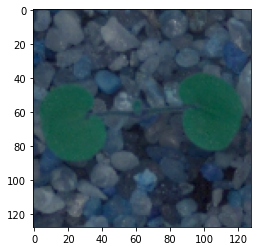

In [203]:
plt.imshow(data1[0]) # , cmap='gray')

#### After Gaussian blur

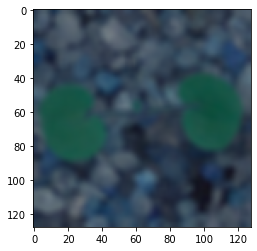

In [204]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[0]) # , cmap='gray')
#plt.title(y[i])

#### Before image

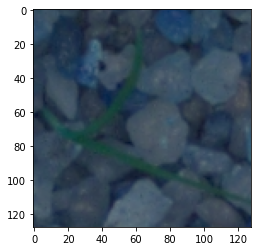

In [205]:
plt.imshow(data1[4700]) #, cmap='gray')

#### After Gaussian blur

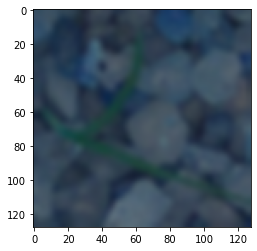

In [206]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[4700]) #, cmap='gray')
#plt.title(y[i])

#### Before Image

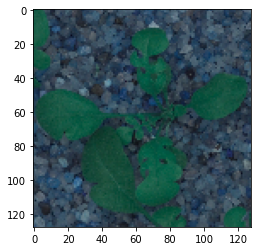

In [207]:
plt.imshow(data1[1000]) #, cmap='gray')

#### After Gaussian blur

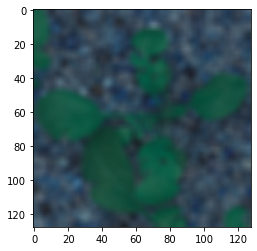

In [208]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[1000]) #, cmap='gray')
#plt.title(y[i])

#### Make data compatible

In [222]:
y = labels['code']

In [223]:
y.head()

0    10
1    10
2    10
3    10
4    10
Name: code, dtype: int8

In [224]:
y = tensorflow.keras.utils.to_categorical(y, 12)

In [225]:
y.shape

(4750, 12)

In [226]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [233]:
i = 0
print(f'Label ID: {i} \n Name: {labels.Label[i]} \n {labels.code[i]}')
print(f'{y[0]}')

Label ID: 0 
 Name: Small-flowered Cranesbill 
 10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [229]:
new_x[0]

array([[[0.16180778, 0.2205134 , 0.30295554],
        [0.17520155, 0.23439276, 0.31427342],
        [0.20624132, 0.26652041, 0.34097913],
        ...,
        [0.30706471, 0.3657243 , 0.42713019],
        [0.30839771, 0.36701313, 0.42770886],
        [0.30974805, 0.36832806, 0.42923063]],

       [[0.16085957, 0.22147329, 0.30388999],
        [0.17525929, 0.23588102, 0.31560007],
        [0.20698485, 0.268047  , 0.34230343],
        ...,
        [0.30642068, 0.36490846, 0.42504051],
        [0.3086395 , 0.3669014 , 0.42621133],
        [0.30973393, 0.36786082, 0.42742959]],

       [[0.16639587, 0.22991817, 0.31044117],
        [0.17979226, 0.24311449, 0.32144639],
        [0.21245687, 0.27527031, 0.34865192],
        ...,
        [0.30528283, 0.36291137, 0.42073292],
        [0.30890539, 0.3661713 , 0.42362797],
        [0.3100597 , 0.36705109, 0.42512137]],

       ...,

       [[0.15181634, 0.20993605, 0.27907029],
        [0.15534364, 0.21264832, 0.28100121],
        [0.15842393, 0

In [236]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, train_size=0.3, random_state=0)

In [243]:
X_train.shape

(1425, 128, 128, 3)

In [246]:
y_train.shape

(1425, 12)

In [244]:
X_test.shape

(3325, 128, 128, 3)

In [247]:
y_test.shape

(3325, 12)

In [ ]:
### Furhter split test and validation .5

In [245]:
X_test1, X_validation, y_test1, y_validation = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [248]:
X_test1.shape

(1662, 128, 128, 3)

In [249]:
y_test1.shape

(1662, 12)

In [286]:
y_test1[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [250]:
X_validation.shape

(1663, 128, 128, 3)

In [251]:
y_validation.shape

(1663, 12)

In [ ]:
#### it’s already in compatible shape

In [253]:
X_train.shape[1:]

(128, 128, 3)

#### Build a model

In [271]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

In [272]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
activation_12 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
activation_13 (Activation)   (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 128)      

In [273]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 10)


model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [274]:
history = model.fit(X_train,y_train, batch_size = 32, epochs = 25, validation_data=(X_validation,y_validation), shuffle = True,
         callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
45/45 [==============================] - ETA: 0s - loss: 2.4261 - accuracy: 0.1453
Epoch 00001: val_loss improved from inf to 2.37960, saving model to cifar_cnn_checkpoint_01_loss2.3796.h5
45/45 [==============================] - 243s 5s/step - loss: 2.4261 - accuracy: 0.1453 - val_loss: 2.3796 - val_accuracy: 0.2429
Epoch 2/25
45/45 [==============================] - ETA: 0s - loss: 2.1203 - accuracy: 0.2982
Epoch 00002: val_loss improved from 2.37960 to 1.93036, saving model to cifar_cnn_checkpoint_02_loss1.9304.h5
45/45 [==============================] - 237s 5s/step - loss: 2.1203 - accuracy: 0.2982 - val_loss: 1.9304 - val_accuracy: 0.3482
Epoch 3/25
45/45 [==============================] - ETA: 0s - loss: 1.7477 - accuracy: 0.4000
Epoch 00003: val_loss improved from 1.93036 to 1.60379, saving model to cifar_cnn_checkpoint_03_loss1.6038.h5
45/45 [==============================] - 236s 5s/step - loss: 1.7477 - accuracy: 0.4000 - val_loss: 1.6038 - val_accuracy: 0.4768
Ep

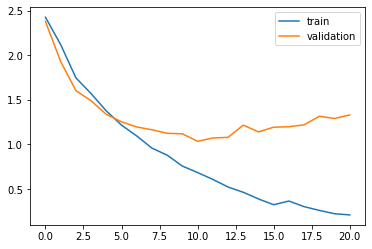

In [275]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [276]:
scores = model.evaluate(X_test1,y_test1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

52/52 [==============================] - 48s 917ms/step - loss: 1.2397 - accuracy: 0.6691
Test Loss: 1.239660620689392
Test Accuracy: 0.6690734028816223


In [290]:
model.evaluate(X_test1, y_test1)

52/52 [==============================] - 48s 914ms/step - loss: 1.2397 - accuracy: 0.6691


[1.239660620689392, 0.6690734028816223]

In [292]:
X_test1[0]

array([[[0.14566998, 0.22249906, 0.30648658],
        [0.14576106, 0.22398606, 0.30696031],
        [0.14709024, 0.22743884, 0.31158507],
        ...,
        [0.23989354, 0.29267862, 0.3583253 ],
        [0.24112757, 0.30077222, 0.372327  ],
        [0.24696264, 0.30826107, 0.38143384]],

       [[0.1519099 , 0.22550221, 0.30914232],
        [0.15054205, 0.22636029, 0.30938277],
        [0.14880666, 0.22774284, 0.31231698],
        ...,
        [0.24186185, 0.29432321, 0.35872033],
        [0.24608557, 0.3057923 , 0.37588778],
        [0.25062692, 0.31259468, 0.3846502 ]],

       [[0.16126972, 0.2314655 , 0.31137183],
        [0.15774214, 0.23075818, 0.31052768],
        [0.14955831, 0.2274963 , 0.31005809],
        ...,
        [0.24831462, 0.30172279, 0.3646318 ],
        [0.25850424, 0.32129729, 0.38875085],
        [0.26330268, 0.3291823 , 0.39903963]],

       ...,

       [[0.26944479, 0.32975844, 0.38262835],
        [0.26824427, 0.32955641, 0.38351467],
        [0.2551766 , 0

In [304]:
y_test1.shape

(1662, 12)

In [313]:
y_test2 = np.argmax(y_test1, axis = 1)

In [314]:
y_test2[0]

6

In [305]:
y_validation.shape

(1663, 12)

In [309]:
y_validation1 = np.delete(y_validation, (1662), axis=0)

In [310]:
y_validation1.shape

(1662, 12)

In [315]:
y_validation2 = np.argmax(y_validation1, axis = 1)

In [316]:
y_validation2[0]

10

In [317]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_validation2, y_test2)
print(cm)

=== Confusion Matrix ===
[[ 4  9  7  9  2  9 18  4 12  1 11  5]
 [ 6 11  8 20 10 16 17  5 13 10 14  8]
 [ 6 10  4 15  6 14  9  6  7  3  8  9]
 [15 19 12 28 10 21 27  8 24 13 24  8]
 [ 6  1  1 14  7 11 11  2  8  3  6  5]
 [ 8 13 13 22  9 14 30  9 19 10  7 20]
 [10 12 18 27  9 18 32  9 33 11 22 22]
 [ 5 10  5 12  2  8 12  3  6  9  7  6]
 [ 9 15 16 28 11  7 26  7 15  8 20 21]
 [ 3  4  7  7  7  5  9  5 12  8  9  8]
 [ 6 18  8 20  7 19 24  6 17  9 26 19]
 [12 12  5 13  7 14 17  1 13  3 18  9]]


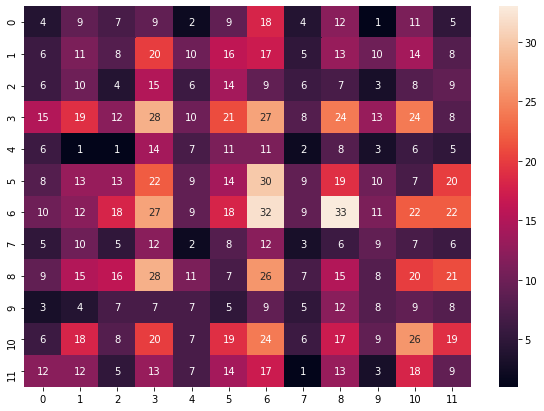

In [320]:
sequence = [0,1,2,3,4,5,6,7,8,9,10,11]
df_cm = pd.DataFrame(cm, index = [i for i in sequence],
                     columns = [i for i in sequence])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

#### x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

In [334]:
#i = 2
#image = data[i]
##label = labels[i][0]
#print(f'Label \n Label ID: {i} \n Name: {labels.Label[i]}')
#plt.imshow(image)

In [344]:
labels.shape

(4750, 3)

In [352]:
#for i in (labels['Label'].unique()):
#    print(f'Label ID: {i} \n Name: {labels.Label[i]} \n {labels.code[i]}')
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [353]:
labels['code'].unique()

array([10,  5,  9,  4,  3,  1,  2,  8, 11,  7,  0,  6], dtype=int8)

#### Predicted image (after)

Text(0.5, 1.0, '7')

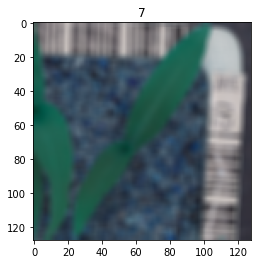

In [346]:
i = 2
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_test2[i])

Text(0.5, 1.0, '10')

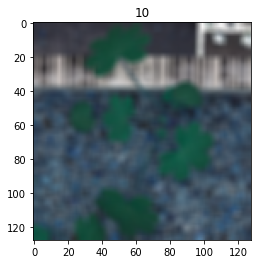

In [347]:
i = 3
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_test2[i])

Text(0.5, 1.0, '4')

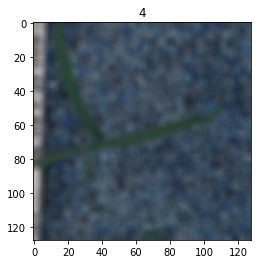

In [348]:
i = 33
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_test2[i])

Text(0.5, 1.0, '0')

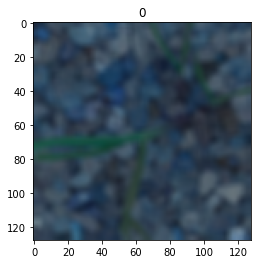

In [349]:
i = 36
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_test2[i])

Text(0.5, 1.0, '10')

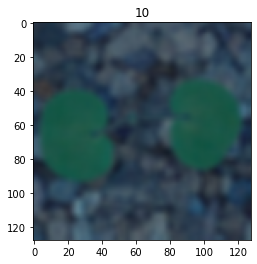

In [350]:
i = 59
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_test2[i])

In [ ]:
img = X_test1[i]
img = img.reshape((128,128,3))
plt.imshow(img) # , cmap='gray')
plt.title(y_pred[i])

In [262]:
#sequence = [0,1,2,3,4,5,6,7,8,9,10,11]
#for i in sequence:
#    print(i)

In [337]:
#print("=== Classification Report ===")
#print(classification_report(y_validation2, y_test2)

#### The performance is not good and confusion matrix numbers are also not good. so trying different things in the model.

In [412]:
model = Sequential()

model.add(Conv2D(128,(5,5), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12))
model.add(Activation('softmax'))

In [413]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 124, 124, 128)     9728      
_________________________________________________________________
activation_18 (Activation)   (None, 124, 124, 128)     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 120, 120, 128)     409728    
_________________________________________________________________
activation_19 (Activation)   (None, 120, 120, 128)     0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 128)       0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 58, 58, 128)      

In [414]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 10)


model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [415]:
history = model.fit(X_train,y_train, batch_size = 32, epochs = 25, validation_data=(X_validation,y_validation), shuffle = True,
         callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
45/45 [==============================] - ETA: 0s - loss: 2.4365 - accuracy: 0.1425 
Epoch 00001: val_loss improved from inf to 2.42894, saving model to cifar_cnn_checkpoint_01_loss2.4289.h5
45/45 [==============================] - 855s 19s/step - loss: 2.4365 - accuracy: 0.1425 - val_loss: 2.4289 - val_accuracy: 0.2345
Epoch 2/25
45/45 [==============================] - ETA: 0s - loss: 2.2079 - accuracy: 0.2618 
Epoch 00002: val_loss improved from 2.42894 to 1.92042, saving model to cifar_cnn_checkpoint_02_loss1.9204.h5
45/45 [==============================] - 855s 19s/step - loss: 2.2079 - accuracy: 0.2618 - val_loss: 1.9204 - val_accuracy: 0.3662
Epoch 3/25
45/45 [==============================] - ETA: 0s - loss: 1.8209 - accuracy: 0.3579 
Epoch 00003: val_loss improved from 1.92042 to 1.70950, saving model to cifar_cnn_checkpoint_03_loss1.7095.h5
45/45 [==============================] - 842s 19s/step - loss: 1.8209 - accuracy: 0.3579 - val_loss: 1.7095 - val_accuracy: 0.4

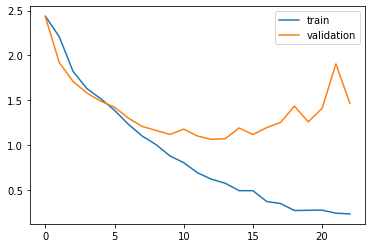

In [416]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [417]:
scores = model.evaluate(X_test1,y_test1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

52/52 [==============================] - 193s 4s/step - loss: 1.3379 - accuracy: 0.6600
Test Loss: 1.3378790616989136
Test Accuracy: 0.6600481271743774


In [418]:
X_test1[0]

array([[[0.14566998, 0.22249906, 0.30648658],
        [0.14576106, 0.22398606, 0.30696031],
        [0.14709024, 0.22743884, 0.31158507],
        ...,
        [0.23989354, 0.29267862, 0.3583253 ],
        [0.24112757, 0.30077222, 0.372327  ],
        [0.24696264, 0.30826107, 0.38143384]],

       [[0.1519099 , 0.22550221, 0.30914232],
        [0.15054205, 0.22636029, 0.30938277],
        [0.14880666, 0.22774284, 0.31231698],
        ...,
        [0.24186185, 0.29432321, 0.35872033],
        [0.24608557, 0.3057923 , 0.37588778],
        [0.25062692, 0.31259468, 0.3846502 ]],

       [[0.16126972, 0.2314655 , 0.31137183],
        [0.15774214, 0.23075818, 0.31052768],
        [0.14955831, 0.2274963 , 0.31005809],
        ...,
        [0.24831462, 0.30172279, 0.3646318 ],
        [0.25850424, 0.32129729, 0.38875085],
        [0.26330268, 0.3291823 , 0.39903963]],

       ...,

       [[0.26944479, 0.32975844, 0.38262835],
        [0.26824427, 0.32955641, 0.38351467],
        [0.2551766 , 0

In [419]:
y_test1.shape

(1662, 12)

In [421]:
y_test2 = np.argmax(y_test1, axis = 1)

In [422]:
y_validation.shape

(1663, 12)

In [424]:
y_validation1 = np.delete(y_validation, (1662), axis=0)  #### Deleted as number of records are different from test by one.

In [425]:
y_validation2 = np.argmax(y_validation1, axis = 1)

In [426]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_validation2, y_test2)
print(cm)

=== Confusion Matrix ===
[[ 4  9  7  9  2  9 18  4 12  1 11  5]
 [ 6 11  8 20 10 16 17  5 13 10 14  8]
 [ 6 10  4 15  6 14  9  6  7  3  8  9]
 [15 19 12 28 10 21 27  8 24 13 24  8]
 [ 6  1  1 14  7 11 11  2  8  3  6  5]
 [ 8 13 13 22  9 14 30  9 19 10  7 20]
 [10 12 18 27  9 18 32  9 33 11 22 22]
 [ 5 10  5 12  2  8 12  3  6  9  7  6]
 [ 9 15 16 28 11  7 26  7 15  8 20 21]
 [ 3  4  7  7  7  5  9  5 12  8  9  8]
 [ 6 18  8 20  7 19 24  6 17  9 26 19]
 [12 12  5 13  7 14 17  1 13  3 18  9]]


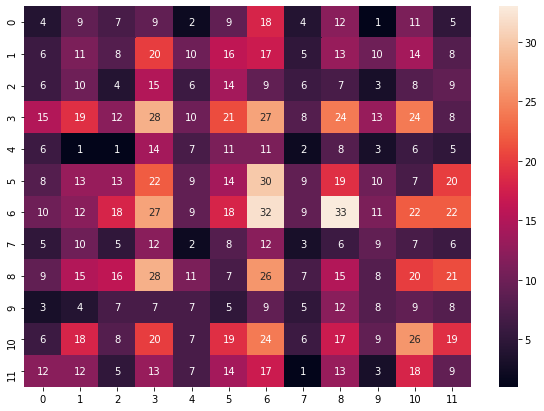

In [427]:
sequence = [0,1,2,3,4,5,6,7,8,9,10,11]
df_cm = pd.DataFrame(cm, index = [i for i in sequence],
                     columns = [i for i in sequence])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

### Tried but no change in accuracy. Below is the worst performing of the three models I tried. so finally got only 66% accuracy. Looks like my model is getting overfit. But no time to analyze as it takes so much time to process.


#### Not good so forget about it.

In [406]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.2))


model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(12, activation='softmax'))

In [407]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_8 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 56, 56, 128)      

In [408]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 10)


model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [409]:
history = model.fit(X_train,y_train, batch_size = 32, epochs = 25, validation_data=(X_validation,y_validation), shuffle = True,
         callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
45/45 [==============================] - ETA: 0s - loss: 2.6774 - accuracy: 0.2196 
Epoch 00001: val_loss improved from inf to 2.63322, saving model to cifar_cnn_checkpoint_01_loss2.6332.h5
45/45 [==============================] - 784s 17s/step - loss: 2.6774 - accuracy: 0.2196 - val_loss: 2.6332 - val_accuracy: 0.1106
Epoch 2/25
45/45 [==============================] - ETA: 0s - loss: 1.7061 - accuracy: 0.4625 
Epoch 00002: val_loss did not improve from 2.63322
45/45 [==============================] - 889s 20s/step - loss: 1.7061 - accuracy: 0.4625 - val_loss: 3.0861 - val_accuracy: 0.0451
Epoch 3/25
45/45 [==============================] - ETA: 0s - loss: 1.3471 - accuracy: 0.5502 
Epoch 00003: val_loss did not improve from 2.63322
45/45 [==============================] - 817s 18s/step - loss: 1.3471 - accuracy: 0.5502 - val_loss: 3.6613 - val_accuracy: 0.1052
Epoch 4/25
45/45 [==============================] - ETA: 0s - loss: 1.1724 - accuracy: 0.6147 
Epoch 00004: val_lo

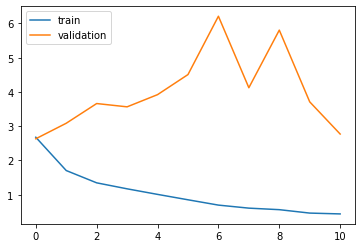

In [410]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()
plt.show()

In [411]:
scores = model.evaluate(X_test1,y_test1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])

52/52 [==============================] - 121s 2s/step - loss: 2.8869 - accuracy: 0.2972
Test Loss: 2.886897563934326
Test Accuracy: 0.2972322404384613


In [ ]:
model.evaluate(X_test1, y_test1)